In [1]:
%reload_ext autoreload
%autoreload 2
from backend import load_data, data_wrangling, calculate_completion_rate, error_rate, drop_off_rate, statistic_func, calculate_avg_time_per_step
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [2]:
client_profiles, experiment_roster, web_group = load_data()

In [3]:
client_process_counts, final_rooster_process_counts_profile, control_profile_df, test_profile_df, web_group_experiment, client_profile_experiment = data_wrangling(web_group,experiment_roster,client_profiles)

# Not all clients were part of experiment

Separating regular clients from A/B test clients

In [4]:
web_group['visit_id'].nunique()

158095

In [5]:
web_group['visitor_id'].nunique()

130236

In [6]:
web_group['client_id'].nunique()

120157

In [7]:
web_group['process_step'].nunique()

5

In [8]:
web_group['date_time'].nunique()

629363

In [9]:
client_process_counts

process_step,start,step_1,step_2,step_3,confirm
client_id,,,,,
169,1,1,1,1,1
336,2,0,0,0,0
546,1,1,1,1,1
555,1,1,1,1,1
647,1,1,1,1,1
...,...,...,...,...,...
9999729,4,3,2,1,1
9999768,3,3,3,2,1
9999832,1,1,0,0,0


In [10]:
final_rooster_process_counts_profile

,client_id,start,step_1,step_2,step_3,confirm,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,1,1,1,1,1,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,647,1,1,1,1,1,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0
2,934,4,0,0,0,0,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0
3,1028,1,5,2,1,0,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
4,1104,2,0,0,0,0,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,9999150,2,1,0,0,0,Test,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0
50496,9999400,1,1,1,1,1,Test,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0
50497,9999626,1,1,0,0,0,Test,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0
50498,9999729,4,3,2,1,1,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0


In [11]:
control_profile_df

,client_id,start,step_1,step_2,step_3,confirm,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
3,1028,1,5,2,1,0,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
4,1104,2,0,0,0,0,Control,5.0,66.0,48.0,U,3.0,154643.94,6.0,9.0
5,1186,2,1,1,0,0,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0
6,1195,1,1,1,1,1,Control,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0
7,1197,1,1,2,2,1,Control,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50485,9997125,1,1,1,1,1,Control,5.0,70.0,57.5,U,2.0,38151.27,0.0,3.0
50486,9997391,1,1,3,3,0,Control,4.0,52.0,60.0,U,2.0,77291.01,6.0,9.0
50487,9997470,8,4,2,2,1,Control,6.0,82.0,36.0,U,2.0,53543.03,0.0,3.0
50489,9998346,1,2,4,4,1,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0


In [12]:
test_profile_df

,client_id,start,step_1,step_2,step_3,confirm,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,1,1,1,1,1,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,647,1,1,1,1,1,Test,12.0,151.0,57.5,M,2.0,30525.80,0.0,4.0
2,934,4,0,0,0,0,Test,9.0,109.0,51.0,F,2.0,32522.88,0.0,3.0
8,1336,1,1,1,1,3,Test,48.0,576.0,42.0,M,4.0,130537.18,6.0,9.0
9,1346,5,2,1,2,0,Test,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,9999150,2,1,0,0,0,Test,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0
50496,9999400,1,1,1,1,1,Test,7.0,86.0,28.5,U,2.0,51787.04,0.0,3.0
50497,9999626,1,1,0,0,0,Test,9.0,113.0,35.0,M,2.0,36642.88,6.0,9.0
50498,9999729,4,3,2,1,1,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0


In [13]:
(test_profile_df['confirm'] > 0).value_counts()

confirm
True     18687
False     8281
Name: count, dtype: int64

In [14]:
(control_profile_df['confirm'] > 0).value_counts()

confirm
True     15434
False     8098
Name: count, dtype: int64

In [15]:
web_group_experiment

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,Control


In [16]:
client_profile_experiment

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,0,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,0,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


# KPI's

# Completion Rate

In [17]:
calculate_completion_rate(web_group_experiment,'Control')

65.58728539860616

In [18]:
calculate_completion_rate(web_group_experiment,'Test')

69.29323642835953

# Average Time per Step

In [19]:
calculate_avg_time_per_step(web_group_experiment,'Control')

process_step
step_1    0 days 00:30:38.781647281
step_2    0 days 00:00:39.342259834
step_3    0 days 00:09:35.220494575
confirm   0 days 18:21:17.307379630
Name: time_diff, dtype: timedelta64[ns]

In [20]:
calculate_avg_time_per_step(web_group_experiment,'Test')

process_step
step_1    0 days 00:22:19.804570955
step_2    0 days 00:01:51.212471355
step_3    0 days 00:12:18.920516488
confirm   1 days 05:00:32.783103231
Name: time_diff, dtype: timedelta64[ns]

In [21]:
calculate_avg_time_per_step(web_group_experiment,'Overall')

process_step
step_1    0 days 00:25:56.019441799
step_2    0 days 00:01:18.503631663
step_3    0 days 00:11:02.287741086
confirm   1 days 00:40:39.014174987
Name: time_diff, dtype: timedelta64[ns]

# Error Rates

In [22]:
control_total_errors, control_total_steps, control_error_rate, control_average_error_per_step = error_rate(web_group_experiment,'Control')
control_average_error_per_step

process_step
0    17.828936
1     7.904139
2     9.163254
3     0.570301
4     0.000000
Name: process_step, dtype: float64

In [23]:
test_total_errors, test_total_steps, test_error_rate, test_average_error_per_step = error_rate(web_group_experiment,'Test')
test_average_error_per_step

process_step
0    23.550660
1     8.922307
2     7.421988
3     0.111995
4     0.000000
Name: process_step, dtype: float64

In [24]:
total_errors, total_steps, error_rate, average_error_per_step = error_rate(web_group_experiment)
average_error_per_step

process_step
0    20.933495
1     8.480916
2     8.214505
3     0.326562
4     0.000000
Name: process_step, dtype: float64

# Drop-off Rates

In [25]:
drop_off_rate(web_group_experiment,'Control')

,process_step,dropoff_rate
0,0,13.869299
1,1,7.453355
2,2,6.584450
3,3,11.410860
4,4,0.000000


In [26]:
drop_off_rate(web_group_experiment,'Test')

,process_step,dropoff_rate
0,0,9.040819
1,1,8.278732
2,2,6.186540
3,3,10.507160
4,4,0.000000


In [27]:
drop_off_rate(web_group_experiment)

,process_step,dropoff_rate
0,0,11.296829
1,1,7.904275
2,2,6.367948
3,3,10.918205
4,4,0.000000


# Visualizing

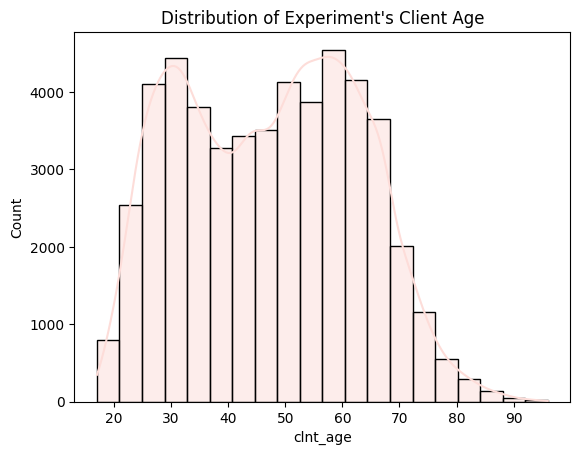

In [28]:
sns.set_palette("RdPu")
sns.histplot(final_rooster_process_counts_profile['clnt_age'], bins=20, kde=True)
plt.title("Distribution of Experiment's Client Age")
plt.show()

In [29]:
# Dealing with Outliers

max_value = 42
final_rooster_process_counts_profile['clnt_tenure_yr']
final_rooster_process_counts_profile['clnt_tenure_yr'] = np.where(final_rooster_process_counts_profile['clnt_tenure_yr'] > max_value, np.nan, final_rooster_process_counts_profile['clnt_tenure_yr'])

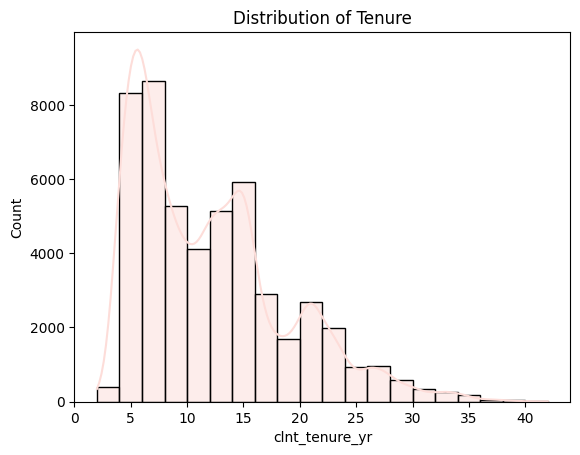

In [30]:
sns.set_palette("RdPu")
sns.histplot(final_rooster_process_counts_profile['clnt_tenure_yr'], bins=20, kde=True)
plt.title('Distribution of Tenure')
plt.show()

In [31]:
# Creating Age Groups
final_rooster_process_counts_profile['age_group'] = pd.cut(final_rooster_process_counts_profile['clnt_age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

Text(0.5, 1.0, 'Distribution of Clients by Age Group')

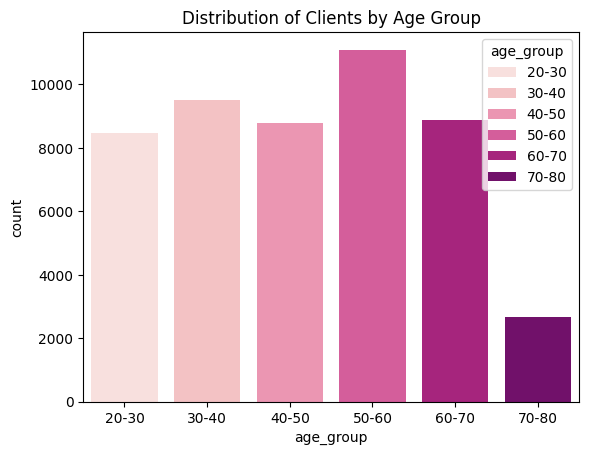

In [32]:
sns.set_palette("RdPu")
sns.countplot(x='age_group', data=final_rooster_process_counts_profile, hue='age_group')
plt.title('Distribution of Clients by Age Group')

Text(0.5, 1.0, 'Age vs. Tenure')

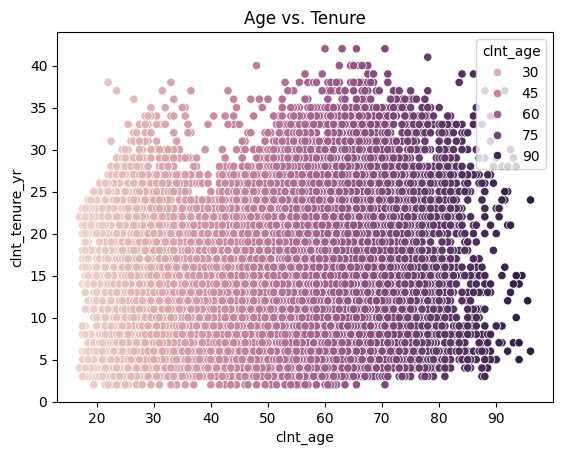

In [33]:
sns.set_palette("RdPu")
sns.scatterplot(x='clnt_age', y='clnt_tenure_yr', data=final_rooster_process_counts_profile, hue='clnt_age')
plt.title('Age vs. Tenure')

Text(0.5, 1.0, 'Age Distribution by A/B Test')

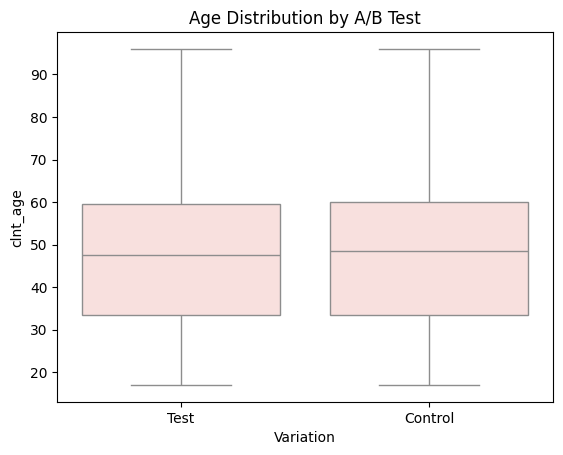

In [34]:
# Age Distribution in A/B testing

sns.boxplot(x='Variation', y='clnt_age', data=final_rooster_process_counts_profile)
plt.title('Age Distribution by A/B Test')

Text(0.5, 1.0, 'Number of Logons by Age Group and Test Group')

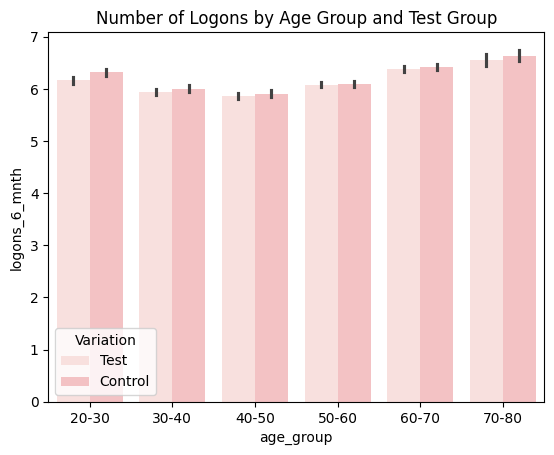

In [35]:
sns.set_palette("RdPu")
sns.barplot(x='age_group', y='logons_6_mnth', hue='Variation', data=final_rooster_process_counts_profile)
plt.title('Number of Logons by Age Group and Test Group')

Text(0.5, 1.0, 'Number of Logons in the Last 6 Months by Variation')

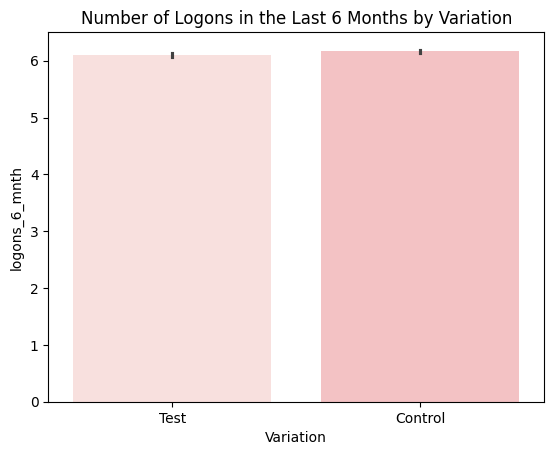

In [36]:
# Client Behavior Analysis - logins

sns.set_palette("RdPu")
sns.barplot(x='Variation', y='logons_6_mnth', data=final_rooster_process_counts_profile, hue='Variation')
plt.title('Number of Logons in the Last 6 Months by Variation')

Text(0.5, 1.0, 'Number of Calls in the Last 6 Months by Variation')

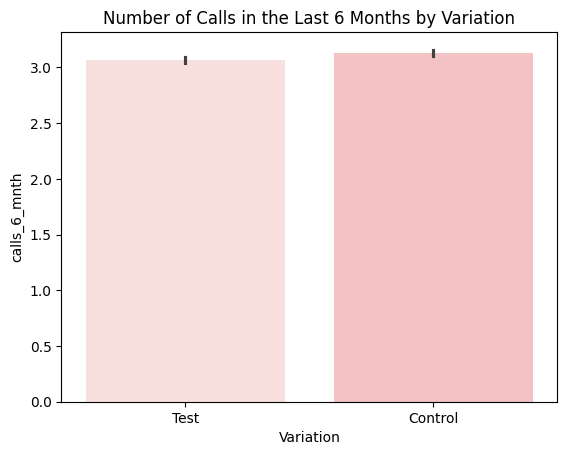

In [37]:
# Client Behavior Analysis - calls

sns.set_palette("RdPu")
sns.barplot(x='Variation', y='calls_6_mnth', data=final_rooster_process_counts_profile, hue='Variation')
plt.title('Number of Calls in the Last 6 Months by Variation')

In [38]:
# Creating conversion rates for the Visualization

conversion_rates = web_group_experiment.groupby('Variation')['process_step'].value_counts(normalize=True).unstack()
desired_order = [0, 1, 2, 3, 4]
conversion_rates = conversion_rates[desired_order]
conversion_rates

process_step,0,1,2,3,4
Variation,,,,,
Control,0.331851,0.206800,0.180438,0.158892,0.122018
Test,0.317543,0.217985,0.174245,0.145597,0.144630


Text(0.5, 1.0, 'Completion Rates by Process Step and Test Group')

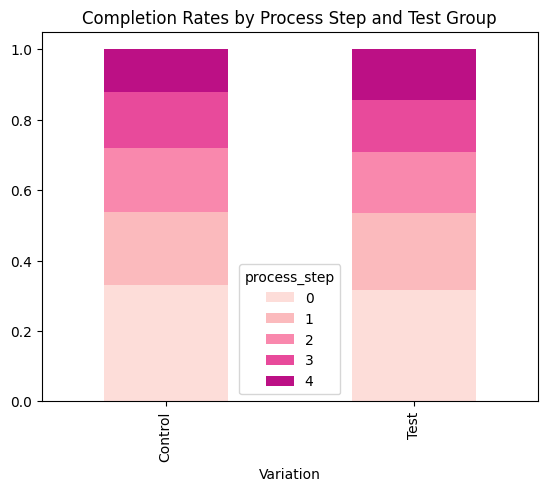

In [39]:
sns.set_palette("RdPu")
conversion_rates.plot(kind='bar', stacked=True)
plt.title('Conversion Rates by Process Step and Variation')
plt.title('Completion Rates by Process Step and Test Group')

# Hypothesis Testing

In [40]:
"""Hypothesis

-Null Hypothesis: The completion rate for the Test group 
(new design) is equal to the completion rate for the Control group (old design).

-Alternative Hypothesis: The completion rate for the Test group 
(new design) is not equal to the completion rate for the Control group (old design)."""

'Hypothesis\n\n-Null Hypothesis: The completion rate for the Test group \n(new design) is equal to the completion rate for the Control group (old design).\n\n-Alternative Hypothesis: The completion rate for the Test group \n(new design) is not equal to the completion rate for the Control group (old design).'

In [41]:
completion_z_value, completion_p_value, completion_hypothesis = statistic_func(web_group_experiment, 'completition rate', 'two-proportion z-test', 0.05)

Z-statistic: -8.8745141890702
P-value: 7.023933247581432e-19
Reject the null hypothesis: There is evidence that completion rates are different.


In [42]:
"""Hypothesis

-Null Hypothesis: The completion rate for the Test group 
(new design) is equal to or less than the completion rate for the Control group (old design) increased by 5%.

-Alternative Hypothesis: The completion rate for the Test group 
(new design) is greater than the completion rate for the Control group (old design) increased by 5%."""

'Hypothesis\n\n-Null Hypothesis: The completion rate for the Test group \n(new design) is equal to or less than the completion rate for the Control group (old design) increased by 5%.\n\n-Alternative Hypothesis: The completion rate for the Test group \n(new design) is greater than the completion rate for the Control group (old design) increased by 5%.'

In [43]:
increase_5_z_value, increase_5_p_value, increase_5_hypothesis = statistic_func(web_group_experiment, '5% increase', 'one-sided z-test', 0.05)

Z-statistic: -8.8745
P-value: 1.0000
Fail to reject the null hypothesis: There is no significant evidence that the completion rate for the Test group is greater than the Control group increased by 5%.


# Gender Hypothesis

In [ ]:
"""Hypothesis

-Null Hypothesis: The proportion of clients engaging with the 
new process is the same for both genders.

-Alternative Hypothesis: The proportion of clients engaging with the
new process is different between genders."""

In [44]:
gender_chi, gender_p_value, gender_hypothesis = statistic_func(final_rooster_process_counts_profile, 'gender', 'chi-test',0.05)

Chi-square statistic: 3.6235
P-value: 0.3051
Fail to reject the null hypothesis: There is no significant difference in the proportion of clients engaging with the new process across different gender categories.


# Client Age Hypothesis

In [ ]:
"""Hypothesis

-Null Hypothesis: The average age of clients engaging with the 
new process is equal to the average age of clients engaging with the old process.

-Alternative Hypothesis: The average age of clients engaging with 
the new process is not equal to the average age of clients engaging with the old process."""

In [45]:
age_t_value, age_p_value, age_hypothesis = statistic_func(final_rooster_process_counts_profile, 'age', 't-test',0.05)

T-statistic: 2.4161
P-value: 0.0157
Reject the null hypothesis: There is a significant difference in the average age between the Control and Test groups.


# Client Tenure Hypothesis

In [ ]:
"""Hypothesis

-Null Hypothesis: The average client tenure of those engaging with 
the new process is equal to the average client tenure of those engaging with the old process.

-Alternative Hypothesis: The average client tenure of those engaging with 
the new process is different from the average client tenure of those engaging with the old process."""

In [46]:
# It's also possible to calculate the tenure from months.
# Just substitute 'tenure years' for 'tenure months'
# Still, you'll get the same result.

tenure_t_value, tenure_p_value, tenure_hypothesis = statistic_func(final_rooster_process_counts_profile, 'tenure years', 't-test',0.05)

T-statistic: 1.8696
P-value: 0.0615
Fail to reject the null hypothesis: There is no significant difference in the average tenure years between the Control and Test groups.
